In [2]:
!pip install Kqlmagic --no-cache-dir  --upgrade

     ------------------------------------ 237.1/237.1 kB 439.6 kB/s eta 0:00:00
     -------------------------------------- 41.7/41.7 kB 983.8 kB/s eta 0:00:00
     ---------------------------------------- 40.5/40.5 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 151.6/151.6 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 90.0/90.0 kB 282.9 kB/s eta 0:00:00
     -------------------------------------- 173.9/173.9 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 55.5/55.5 kB ? eta 0:00:00
     ---------------------------------------- 85.4/85.4 kB ? eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 1.5 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11123 sha256=38093940b2df53da731799ec5d4ad663f84c4eddf43e754dab908032a4aceaf9
  Stored in directory: C:\Users\JEFFRE~1.MO

In [38]:
!pip install seaborn


In [37]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install pandas

In [1]:
import pandas as pd
import datetime
import pickle
import binascii

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


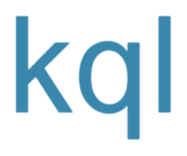

In [2]:
%reload_ext Kqlmagic

In [3]:
%kql AzureDataExplorer://tenant="Unilever.com";code;cluster='dfazuredataexplorer.westeurope';database='dfdataviewer'

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [5]:
# NOTE: to make hash() consistent set env. variable PYTHONHASHSEED=0
%env PYTHONHASHSEED=0

q = '''
Common2
'''

fn = "df" + str(hash(q)) + ".pkl"
print("Cache file name: ", fn)

env: PYTHONHASHSEED=0
Cache file name:  df-1505838486262866356.pkl


In [6]:
fn = "df" + str(hash(q)) + ".pkl"
try:
    df = pd.read_pickle(fn)
    print("Load df from " + fn)
except:
    print("Execute query...")
    try:
        %kql res << -query q
        df = res.to_dataframe()
        print("Save df to " + fn)
        df.to_pickle(fn)
        print("\n", df.shape, "\n", df.columns)
    except Exception as ex:
        print(ex)

Execute query...
Save df to df-1505838486262866356.pkl

 (500001, 7) 
 Index(['IotDeviceId', 'SensorId', 'SiteId', 'MachineId', 'Tag', 'Value', 'TS'], dtype='object')


In [11]:
train_x = df[df['Tag'] == False][['IotDeviceId', 'SensorId', 'MachineId', 'SiteId', 'TS']]
train_y = df[df['Tag'] == False]['Value']
test_x = df[df['Tag'] == True][['IotDeviceId', 'SensorId', 'MachineId', 'SiteId', 'TS']]
test_y = df[df['Tag'] == True]['Value']

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(0, 5) (0,) (0, 5) (0,)


In [12]:
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#four classifier types
clf1 = tree.DecisionTreeClassifier()
clf2 = LogisticRegression()
clf3 = neighbors.KNeighborsClassifier()
clf4 = naive_bayes.GaussianNB()

In [13]:
clf1 = clf1.fit(train_x, train_y)
clf2 = clf2.fit(train_x, train_y)
clf3 = clf3.fit(train_x, train_y)
clf4 = clf4.fit(train_x, train_y)

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [7]:
print(df.shape, "\n")
print(df[-4:])

(500001, 7) 

                     IotDeviceId SensorId      SiteId MachineId  \
499997  utv-chiplundf-iotedge-01    opcua  Chiplun DF     EMS_C   
499998  utv-chiplundf-iotedge-01    opcua  Chiplun DF     EMS_C   
499999  utv-chiplundf-iotedge-01    opcua  Chiplun DF     EMS_C   
500000              OneApiErrors     None        None      None   

                                                      Tag      Value  \
499997  EMS.EMS.EMS_CPU-1-UGR_IN_VFD_PANEL_1ST_FLR_CAS...   415.2483   
499998  EMS.EMS.EMS_CPU-1-UGR_IN_VFD_PANEL_1ST_FLR_CAS...   0.786637   
499999  EMS.EMS.EMS_CPU-1-UGR_IN_VFD_PANEL_1ST_FLR_CAS...  1.3179746   
500000                                               None       None   

                                     TS  
499997 2023-04-05 12:15:48.989000+00:00  
499998 2023-04-05 12:15:48.989000+00:00  
499999 2023-04-05 12:15:48.989000+00:00  
500000                              NaT  


In [8]:
df.groupby(['Tag', 'Value']).size()

Tag                                                                                                                   Value   
                                                                                                                                  4498
00_DFOS_Sensors.PLC_Sensors.Cmt_Count_Out                                                                             262002         1
                                                                                                                      262010         1
                                                                                                                      262018         1
                                                                                                                      812777         1
                                                                                                                                  ... 
siemensTCPIP.Boiler.Hosur Beverage_Utility_BOILER_Boiler PLC_80

In [16]:
%%kql
let stime = now(-10d);
let etime = now();
let MachineID= "901932";
Common2
|where MachineId ==MachineId
|where Value != case(isempty(Value),"unknown", "0")
|where Value != 0
|where  TS between (stime..etime) and Tag has_any(
" ABLogix_Comp_Process.Comp Process.Process_LAB_KPI_CompProcess_LAB_PressureVal",
" ABLogix_Comp_Process.Comp Process.Process_LAB_KPI_CompProcess_LAB_RPM",
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure1" ,
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure2" ,
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Pressure3" ,
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Temperature1" ,
"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_Conductivity" ,
"ABLogix_Comp_Process.Comp Process.Process_Processing_Change _Relay_Comp Process_901932_FQIJ10612_Totalizer")
| summarize arg_max(TS, Value) by bin(TS, 2m), Tag // summarizes the value by hour
| sort by Tag, TS asc
| parse Tag with *"ABLogix_Comp_Process_2.Comp Process 2.Process_Sono 7_Sono7_Comp Process 2_901932_" Test
| evaluate pivot(Test, max(Value),TS) 

[{'TS': datetime.datetime(2023, 5, 9, 15, 22, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '109144'},
 {'TS': datetime.datetime(2023, 5, 9, 14, 26, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 14, 28, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 14, 18, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 14, 14, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 13, 58, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 14, 12, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 14, 20, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 13, 44, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 12, 44, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '93674'},
 {'TS': datetime.datetime(2023, 5, 9, 12, 46, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '93674'},
 {'TS': datetime.datetime(2023, 5, 9, 12, 48, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '93674'},
 {'TS': datetime.datetime(2023, 5, 9, 12, 50, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '93674'},
 {'TS': datetime.datetime(2023, 5, 9, 12, 52, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '93674'},
 {'TS': datetime.datetime(2023, 5, 9, 12, 54, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '93674'},
 {'TS': datetime.datetime(2023, 5, 9, 13, 8, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '95326'},
 {'TS': datetime.datetime(2023, 5, 9, 13, 10, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '95326'},
 {'TS': datetime.datetime(2023, 5, 9, 13, 12, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '95326'},
 {'TS': datetime.datetime(2023, 5, 9, 13, 14, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '95326'},
 {'TS': datetime.datetime(2023, 5, 9, 13, 34, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty': '99824'},
 {'TS': datetime.datetime(2023, 5, 9, 13, 16, tzinfo=tzutc()), 'Conductivity': '0.07', 'Pressure1': '0.1', 'Pressure2': '-1', 'Pressure3': '-0.1', 'Temperature1': '23.5', '_Empty':

In [17]:
df = _kql_raw_result_.to_dataframe()
df.head()

TS Conductivity Pressure1 Pressure2 Pressure3  \
0 2023-05-09 15:22:00+00:00         0.07       0.1        -1      -0.1   
1 2023-05-09 14:26:00+00:00         0.07       0.1        -1      -0.1   
2 2023-05-09 14:28:00+00:00         0.07       0.1        -1      -0.1   
3 2023-05-09 14:18:00+00:00         0.07       0.1        -1      -0.1   
4 2023-05-09 14:14:00+00:00         0.07       0.1        -1      -0.1   

  Temperature1  _Empty  
0         23.5  109144  
1         23.5   99824  
2         23.5   99824  
3         23.5   99824  
4         23.5   99824

In [18]:
print(df.shape, "\n")
print(df[-4:])

(7200, 7) 

                            TS Conductivity Pressure1 Pressure2 Pressure3  \
7196 2023-05-08 16:02:00+00:00         0.07       0.1        -1      -0.1   
7197 2023-05-08 16:10:00+00:00         0.07       0.1        -1      -0.1   
7198 2023-05-08 16:16:00+00:00         0.07       0.1        -1      -0.1   
7199 2023-05-08 18:06:00+00:00         0.07       0.1        -1      -0.1   

     Temperature1    _Empty  
7196         23.5  11283865  
7197         23.5  11283865  
7198         23.5  11283865  
7199         23.5            


In [19]:
df.groupby(['Pressure1', 'Temperature1']).size()

Pressure1  Temperature1
                              1
0.1        23.5            7199
dtype: int64

In [22]:
train_x = df[df['Pressure1'] == False][['TS', 'Conductivity', 'Pressure2', 'Pressure3']]
train_y = df[df['Pressure1'] == False]['Temperature1']
test_x = df[df['Pressure1'] == True][['TS', 'Conductivity', 'Pressure2', 'Pressure3']]
test_y = df[df['Pressure1'] == True]['Temperature1']

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(0, 4) (0,) (0, 4) (0,)


In [71]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pd.set_option('display.max_colwidth', -1)

C:\Users\Jeffrey.Mosley\AppData\Local\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   TS            1944 non-null   datetime64[ns, UTC]
 1   _PressureVal  1944 non-null   object             
 2   _RPM          1944 non-null   object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 45.7+ KB


In [73]:
df.head(5)

TS _PressureVal _RPM
0 2023-05-16 21:15:20+00:00  4.066148        
1 2023-05-16 21:15:30+00:00  4.066148        
2 2023-05-16 21:15:40+00:00  4.2607007       
3 2023-05-16 21:15:50+00:00  4.2607007       
4 2023-05-16 21:16:00+00:00  4.066148

In [88]:
df.replace('', np.nan, inplace=True)
df.head()

TS _PressureVal _RPM  Id
0 2023-05-16 21:15:20+00:00  4.066148     NaN  0 
1 2023-05-16 21:15:30+00:00  4.066148     NaN  1 
2 2023-05-16 21:15:40+00:00  4.2607007    NaN  2 
3 2023-05-16 21:15:50+00:00  4.2607007    NaN  3 
4 2023-05-16 21:16:00+00:00  4.066148     NaN  4

In [89]:
 df.dropna(inplace=True)
 df.head()

TS _PressureVal       _RPM  Id
48 2023-05-16 18:06:00+00:00  95.19455     163.5437   48
49 2023-05-16 18:06:10+00:00  94.61089     85.66367   49
50 2023-05-16 18:06:20+00:00  139.22179    140.25797  50
51 2023-05-16 18:06:30+00:00  135.3891     225.00847  51
52 2023-05-16 18:06:40+00:00  86.75097     125.62556  52

In [90]:
df['Id'] = df.index

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 48 to 1943
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   TS            928 non-null    datetime64[ns, UTC]
 1   _PressureVal  928 non-null    object             
 2   _RPM          928 non-null    object             
 3   Id            928 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 36.2+ KB


In [92]:
df.drop(['TS'], axis=1)
df.head(60
    )

TS _PressureVal        _RPM   Id
48  2023-05-16 18:06:00+00:00  95.19455     163.5437    48 
49  2023-05-16 18:06:10+00:00  94.61089     85.66367    49 
50  2023-05-16 18:06:20+00:00  139.22179    140.25797   50 
51  2023-05-16 18:06:30+00:00  135.3891     225.00847   51 
52  2023-05-16 18:06:40+00:00  86.75097     125.62556   52 
53  2023-05-16 18:06:50+00:00  96.36186     85.66367    53 
54  2023-05-16 18:07:00+00:00  135.97276    120.450966  54 
55  2023-05-16 18:07:10+00:00  137.50974    225.00847   55 
56  2023-05-16 18:07:20+00:00  88.463036    123.060005  56 
57  2023-05-16 18:07:30+00:00  99.4358      85.66367    57 
58  2023-05-16 18:07:40+00:00  149.61089    212.83293   58 
59  2023-05-16 18:07:50+00:00  107.31517    215.28978   59 
60  2023-05-16 18:08:00+00:00  87.31518     85.66367    60 
61  2023-05-16 16:31:50+00:00  100.408554   85.68542    61 
62  2023-05-16 16:32:00+00:00  146.53696    225.00847   62 
63  2023-05-16 16:32:10+00:00  100.60312    173.47981   63 
64  2023-05-16 16:32:20+00:00  89.04669     85.66367    64 
65  2023-05-16 16:32:30+00:00  139.04669    141.3668    65 
66  2023-05-16 16:32:40+00:00  136.14786    225.00847   66 
67  2023-05-16 16:32:50+00:00  83.85214     87.07691    67 
68  2023-05-16 16:33:00+00:00  99.4358      85.66367    68 
69  2023-05-16 16:33:10+00:00  148.07393    225.00847   69 
70  2023-05-16 16:33:20+00:00  127.50973    223.3778    70 
71  2023-05-16 16:33:30+00:00  85.38911     85.66367    71 
72  2023-05-16 16:33:40+00:00  104.630356   85.75064    72 
73  2023-05-16 16:33:50+00:00  144.6109     225.00847   73 
74  2023-05-16 15:07:10+00:00  110.3891     85.728905   74 
75  2023-05-16 15:07:20+00:00  146.7315     225.00847   75 
76  2023-05-16 15:07:30+00:00  85.214005    121.75548   76 
77  2023-05-16 15:07:40+00:00  95.778206    85.66367    77 
78  2023-05-16 15:07:50+00:00  147.10117    225.00847   78 
79  2023-05-16 15:08:00+00:00  56.55642     85.66367    79 
80  2023-05-16 15:08:10+00:00  146.90662    225.00847   80 
81  2023-05-16 15:08:20+00:00  91.16732     161.7826    81 
82  2023-05-16 15:08:30+00:00  92.31518     85.66367    82 
83  2023-05-16 15:08:40+00:00  151.14786    171.32735   83 
84  2023-05-16 15:08:50+00:00  108.657585   193.80864   84 
85  2023-05-16 15:09:00+00:00  89.4358      85.66367    85 
86  2023-05-16 15:09:10+00:00  147.49028    170.71858   86 
120 2023-05-16 15:25:30+00:00  89.04669     128.1259    120
121 2023-05-16 15:25:40+00:00  90.77821     85.66367    121
122 2023-05-16 15:25:50+00:00  149.02724    197.85266   122
123 2023-05-16 15:26:00+00:00  133.07393    224.89977   123
124 2023-05-16 15:26:10+00:00  85.38911     85.66367    124
125 2023-05-16 15:26:20+00:00  98.09338     85.66367    125
126 2023-05-16 15:26:30+00:00  147.49028    225.00847   126
127 2023-05-16 15:26:40+00:00  121.945526   224.11703   127
128 2023-05-16 15:26:50+00:00  87.50973     85.66367    128
129 2023-05-16 15:27:00+00:00  14.824903    0.0869682   129
131 2023-05-16 15:27:20+00:00  112.898834   86.59859    131
132 2023-05-16 15:05:20+00:00  101.36187    172.69711   132
133 2023-05-16 15:05:30+00:00  94.61089     85.66367    133
134 2023-05-16 15:05:40+00:00  138.07393    101.12227   134
135 2023-05-16 15:05:50+00:00  120          221.18187   135
136 2023-05-16 15:06:00+00:00  88.657585    85.66367    136
137 2023-05-16 15:06:10+00:00  139.80545    98.77413    137
138 2023-05-16 15:06:20+00:00  132.70427    224.83453   138
139 2023-05-16 15:06:30+00:00  87.704285    85.66367    139
140 2023-05-16 15:06:40+00:00  111.16732    85.728905   140
141 2023-05-16 15:06:50+00:00  136.53697    224.965     141

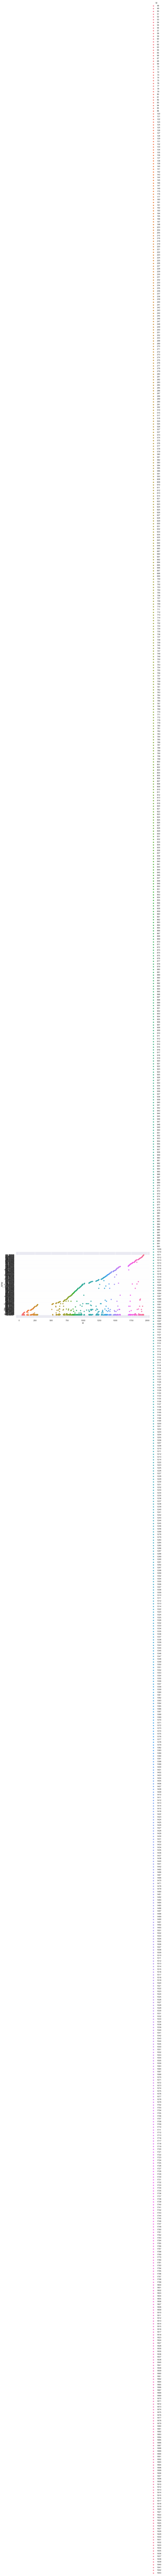

In [93]:
sns.lmplot(x='Id', y='_RPM', data=df,
fit_reg=False,hue='Id', height=6, aspect=2)

In [40]:
X = df[["TS"]].to_numpy()

In [35]:
# view the correlation coefficient (R) for each pair of variables
# R is the square root of R-squared
# A correlation matrix helps select features that are highly predictive of our dependent variable
# It also helps us identify collinearity between independent variables
corr = df.corr()
corr.head()

Empty DataFrame
Columns: []
Index: []

In [ ]:
corr["_PressureVal"]